# Project: Netflix Genre Engagement — Chi-Square Goodness of Fit Test

Objective: Test whether user engagement by genre in Q1 matches historical expectations.

# Step 1: Setup + Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare

# Historical expected proportions (%)
expected_distribution = {
    "Drama": 30,
    "Comedy": 25,
    "Action": 20,
    "Sci-Fi": 15,
    "Documentary": 10
}

# Observed user engagement from Q1
observed_counts = {
    "Drama": 310,
    "Comedy": 290,
    "Action": 180,
    "Sci-Fi": 140,
    "Documentary": 80
}

# Convert to DataFrame
df = pd.DataFrame({
    "Genre": list(observed_counts.keys()),
    "Observed": list(observed_counts.values()),
    "Expected_%": [expected_distribution[genre] for genre in observed_counts]
})

# Calculate expected counts
df["Expected"] = df["Expected_%"] * df["Observed"].sum() / 100

df.head()

,Genre,Observed,Expected_%,Expected
0,Drama,310,30,300.0
1,Comedy,290,25,250.0
2,Action,180,20,200.0
3,Sci-Fi,140,15,150.0
4,Documentary,80,10,100.0


 # Step 2: Chi-Square Test Function

In [6]:
def run_chi_square_test(observed, expected):
    chi_stat, p_val = chisquare(f_obs=observed, f_exp=expected)
    return {
        "Chi-Square Statistic": chi_stat,
        "p-value": p_val,
        "Significant (α=0.05)": p_val < 0.05
    }

result = run_chi_square_test(df["Observed"], df["Expected"])
result

{'Chi-Square Statistic': 13.4,
 'p-value': 0.009478021650585807,
 'Significant (α=0.05)': True}

# Step 3: Visualization

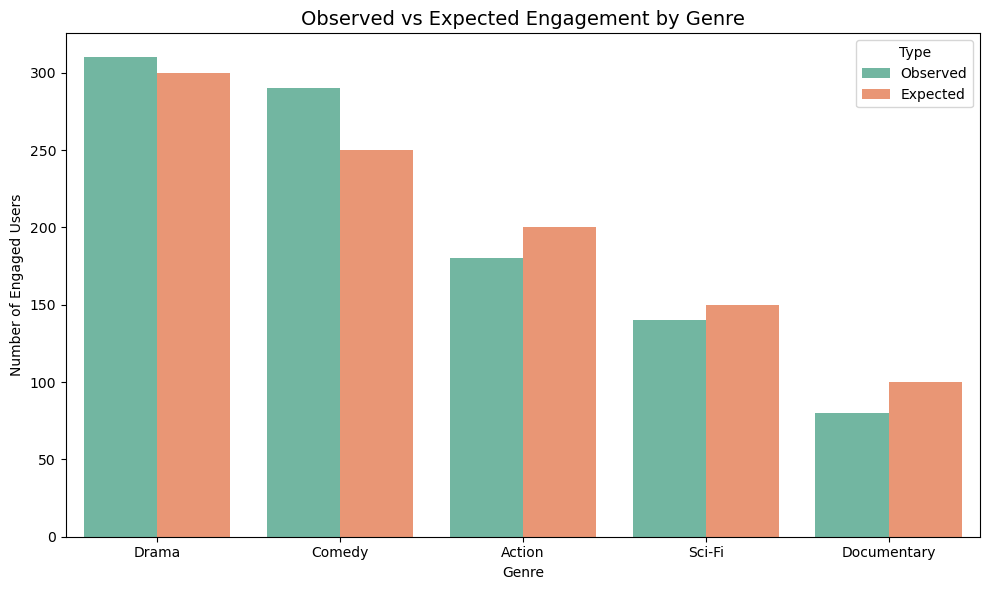

In [9]:
def plot_genre_comparison(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df.melt(id_vars='Genre', value_vars=['Observed', 'Expected']),
                x='Genre', y='value', hue='variable', palette='Set2')
    plt.title("Observed vs Expected Engagement by Genre", fontsize=14)
    plt.ylabel("Number of Engaged Users")
    plt.xlabel("Genre")
    plt.legend(title="Type")
    plt.tight_layout()
    plt.show()

plot_genre_comparison(df)

# Step 4: Executive Summary Function

In [12]:
def executive_summary(result, alpha=0.05):
    print("📊 Chi-Square Goodness of Fit Summary\n")
    print(f"Chi-Square Statistic: {result['Chi-Square Statistic']:.2f}")
    print(f"p-value: {result['p-value']:.4f}")
    if result['p-value'] < alpha:
        print("🚨 Engagement pattern has statistically shifted from historical expectations.")
        print("🧠 Recommendation: Reassess content production allocation per genre.")
    else:
        print("✅ No significant deviation from expected engagement pattern.")
        print("📌 Continue current allocation, but monitor monthly for emerging trends.")

executive_summary(result)

📊 Chi-Square Goodness of Fit Summary

Chi-Square Statistic: 13.40
p-value: 0.0095
🚨 Engagement pattern has statistically shifted from historical expectations.
🧠 Recommendation: Reassess content production allocation per genre.
